#diemrl.xlsx

Tổng quan file Education_dataset_V2 có 2 file điểm rèn luyện có các dữ liệu giống nhau nhóm tiến hành kết hợp 2 file thành 1 là file diemrl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

file_path = r"diemrl.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Loại bỏ khoảng trắng ở đầu và cuối tên các cột
df.columns = df.columns.str.strip()

In [ ]:
df.head()

,id,mssv,lopsh,hocky,namhoc,drl,ghichu
0,1.0,2A10C466XPvAibaEXe8vcQUX+A6FeNIl5Loug1zV,ANTN2012,2.0,2013.0,81.0,NaN
1,2.0,903ADF1AXPvAibaEXe9p5G9u2qRxxZEjiJjD4Ztl,ANTN2012,2.0,2013.0,88.0,NaN
2,3.0,F06EDFFEXPvAibaEXe8KSegZW1rFPMNPBQ+c9rst,ANTN2012,2.0,2013.0,94.0,NaN
3,4.0,AA868AD5XPvAibaEXe+1Gm1QkI5oNyTYwjwmgxhx,ANTN2012,2.0,2013.0,86.0,NaN
4,5.0,E7105148XPvAibaEXe+E7LJdSZ9AW2sUcg4OSCnU,ANTN2012,2.0,2013.0,88.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166035 entries, 0 to 166034
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      131978 non-null  float64
 1   mssv    165979 non-null  object 
 2   lopsh   155451 non-null  object 
 3   hocky   165979 non-null  float64
 4   namhoc  165979 non-null  float64
 5   drl     115311 non-null  float64
 6   ghichu  68769 non-null   object 
dtypes: float64(4), object(3)
memory usage: 8.9+ MB


##Chọn thuộc tính quan trọng

In [ ]:
selected_df = df[['mssv', 'hocky', 'namhoc', 'drl']]

In [ ]:
selected_df.head()

,mssv,hocky,namhoc,drl
0,2A10C466XPvAibaEXe8vcQUX+A6FeNIl5Loug1zV,2.0,2013.0,81.0
1,903ADF1AXPvAibaEXe9p5G9u2qRxxZEjiJjD4Ztl,2.0,2013.0,88.0
2,F06EDFFEXPvAibaEXe8KSegZW1rFPMNPBQ+c9rst,2.0,2013.0,94.0
3,AA868AD5XPvAibaEXe+1Gm1QkI5oNyTYwjwmgxhx,2.0,2013.0,86.0
4,E7105148XPvAibaEXe+E7LJdSZ9AW2sUcg4OSCnU,2.0,2013.0,88.0


##Tính đầy đủ

###Độ đo Completeness

In [ ]:
# Hàm kiểm tra và đánh giá tính đầy đủ
def evaluate_completeness(dataframe, columns):
    print("Đánh giá tính đầy đủ:")
    for column in columns:
        missing_values = dataframe[column].isnull().sum()  # Số lượng giá trị bị thiếu
        total_values = len(dataframe)  # Tổng số giá trị
        complete_percentage = ((total_values - missing_values) / total_values) * 100  # Tỷ lệ đầy đủ
        print(f"Cột '{column}': Số lượng đầy đủ = {total_values - missing_values}, Tỷ lệ đầy đủ = {complete_percentage:.2f}%")


In [ ]:
# Đánh giá trước khi xử lý
print("Trước khi xử lý:")
evaluate_completeness(selected_df, selected_df.columns)

Trước khi xử lý:
Đánh giá tính đầy đủ:
Cột 'mssv': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 99.97%
Cột 'hocky': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 99.97%
Cột 'namhoc': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 99.97%
Cột 'drl': Số lượng đầy đủ = 115311, Tỷ lệ đầy đủ = 69.45%


In [ ]:
# Xóa các hàng có giá trị thiếu trong các cột 'mssv', 'hocky', và 'namhoc'
selected_df = selected_df.dropna(subset=['mssv', 'hocky', 'namhoc'])

In [ ]:
# Đánh giá sau khi xử lý
print("\nSau khi xử lý:")
evaluate_completeness(selected_df, selected_df.columns)


Sau khi xử lý:
Đánh giá tính đầy đủ:
Cột 'mssv': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'hocky': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'namhoc': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'drl': Số lượng đầy đủ = 115311, Tỷ lệ đầy đủ = 69.47%


In [ ]:

# Điền các giá trị thiếu trong cột 'drl' bằng giá trị trung bình theo từng nhóm
selected_df['drl'] = selected_df.groupby(['hocky', 'namhoc'])['drl'].transform(lambda x: x.fillna(x.mean()))


<ipython-input-80-8546a0e60e43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['drl'] = selected_df.groupby(['hocky', 'namhoc'])['drl'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
# Đánh giá sau khi xử lý
print("\nSau khi xử lý:")
evaluate_completeness(selected_df, selected_df.columns)


Sau khi xử lý:
Đánh giá tính đầy đủ:
Cột 'mssv': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'hocky': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'namhoc': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%
Cột 'drl': Số lượng đầy đủ = 165979, Tỷ lệ đầy đủ = 100.00%


Nhận xét: Xử lí các cột mssv, hocky, namhoc bằng cách xoá (do dữ liệu thiếu ít). Do drl thiếu khá nhiều giá trị, thay thế bằng điền giá trị thiếu trong cột 'drl' bằng giá trị trung bình theo từng nhóm (học kỳ và năm học)

##Tính chính xác

In [ ]:
selected_df.describe()

,hocky,namhoc,drl
count,165979.000000,165979.000000,165979.000000
mean,1.449448,2017.017105,76.412881
std,0.497439,3.215390,16.568444
min,1.000000,2009.000000,-45.000000
25%,1.000000,2015.000000,68.000000
50%,1.000000,2018.000000,78.339608
75%,2.000000,2019.000000,85.000000
max,2.000000,2022.000000,122.000000


Nhận xét: Dữ liệu về hocky có vẻ chính xác vì các giá trị nằm trong phạm vi hợp lý là từ 1 đến 2, biểu thị cho các học kỳ trong năm học (thường có hai học kỳ mỗi năm).
Đây là điểm cần lưu ý vì có một số giá trị bất thường:
Giá trị min là -45.0, điều này không hợp lý nếu điểm drl không được phép có giá trị âm. Điểm âm có thể là do nhập liệu sai hoặc dữ liệu bị lỗi.
Giá trị max là 122.0, vượt quá giới hạn thông thường cho thang điểm (thường từ 0 đến 100). Điều này có thể là do nhập liệu sai hoặc sinh viên có điểm vượt quá 100
Giá trị trung bình 76.41 và trung vị 78.34 cho thấy phân phối của dữ liệu có vẻ bình thường

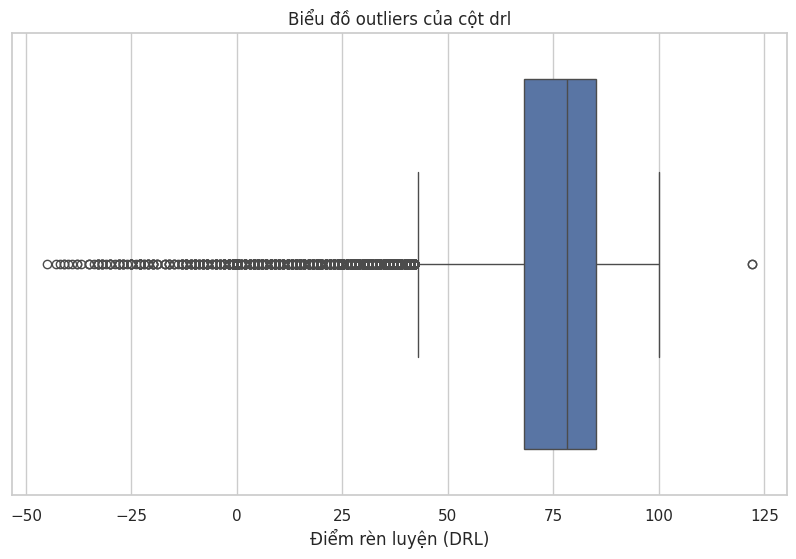

In [ ]:

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


sns.boxplot(data=selected_df, x='drl')
plt.title('Biểu đồ outliers của cột drl')
plt.xlabel('Điểm rèn luyện (DRL)')
plt.show()

###Tỷ lệ chính xác (Accuracy)

In [ ]:
# Hàm tính tỷ lệ chính xác
def calculate_accuracy(data, column, condition):
    total_values = len(data)
    valid_values = data[column].apply(condition).sum()
    accuracy = (valid_values / total_values) * 100
    return accuracy

# Đo lường tính chính xác trước khi xử lý
accuracy_before = calculate_accuracy(selected_df, 'drl', lambda x: 0 <= x <= 100)
print(f"Tính chính xác trước khi xử lý: {accuracy_before:.2f}%")


Tính chính xác trước khi xử lý: 99.88%


In [ ]:
original_drl = selected_df['drl'].copy()

# Thay đổi giá trị nhỏ hơn 0 thành 0 và lớn hơn 100 thành 100
selected_df['drl'] = selected_df['drl'].apply(lambda x: max(0, min(100, x)))

# Tính số dòng đã thay đổi
num_changed_rows = (selected_df['drl'] != original_drl).sum()

# In ra kết quả
print(f"Số dòng đã thay đổi: {num_changed_rows}")

Số dòng đã thay đổi: 191


In [ ]:
# Đo lường tính chính xác sau khi xử lý
accuracy_after = calculate_accuracy(selected_df, 'drl', lambda x: 0 <= x <= 100)
print(f"Tính chính xác sau khi xử lý: {accuracy_after:.2f}%")

Tính chính xác sau khi xử lý: 100.00%


Xử lí giá trị không phù hợp từ 0 đến 100 của giá trị drl giá trị nhỏ hơn 0 thành 0 và lớn hơn 100 thành 100

###Độ đo IQR

In [ ]:
# Tính toán IQR cho cột 'drl'
Q1 = selected_df['drl'].quantile(0.25)  # Phân vị thứ nhất
Q3 = selected_df['drl'].quantile(0.75)  # Phân vị thứ ba
IQR = Q3 - Q1  # Khoảng tứ phân vị

# Xác định ngoại lai
outliers = selected_df[(selected_df['drl'] < (Q1 - 1.5 * IQR)) | (selected_df['drl'] > (Q3 + 1.5 * IQR))]

# Tính tỷ lệ giá trị ngoại lai
num_outliers = len(outliers)  # Số lượng giá trị ngoại lai
total_values = len(selected_df)  # Tổng số giá trị
outlier_percentage = (num_outliers / total_values) * 100  # Tỷ lệ %

# In kết quả
print(f"Số lượng giá trị ngoại lai: {num_outliers}")
print(f"Tỷ lệ giá trị ngoại lai: {outlier_percentage:.2f}%")


Số lượng giá trị ngoại lai: 5005
Tỷ lệ giá trị ngoại lai: 3.02%


##Tính nhất quán

###Độ đo: Tỷ lệ giá trị đúng định dạng (Format Consistency)

In [ ]:
print(selected_df.dtypes)

mssv       object
hocky     float64
namhoc    float64
drl       float64
dtype: object


In [ ]:
# Kiểm tra tính nhất quán của từng cột
total_rows = len(selected_df)

# Kiểm tra 'mssv': là chuỗi và không rỗng
valid_mssv = selected_df['mssv'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0).sum()
mssv_consistency = (valid_mssv / total_rows) * 100

# Kiểm tra 'hocky': là số thực và giá trị trong phạm vi (1,2,3)
valid_hocky = selected_df['hocky'].apply(lambda x: isinstance(x, (int, float)) and 1 <= x <= 3).sum()
hocky_consistency = (valid_hocky / total_rows) * 100

# Kiểm tra 'namhoc': là số thực và giá trị trong phạm vi hợp lệ (2000–2025)
valid_namhoc = selected_df['namhoc'].apply(lambda x: isinstance(x, (int, float)) and 2000 <= x <= 2025).sum()
namhoc_consistency = (valid_namhoc / total_rows) * 100

# Kiểm tra 'drl': là số thực và giá trị trong phạm vi [0, 100]
valid_drl = selected_df['drl'].apply(lambda x: isinstance(x, (int, float)) and 0 <= x <= 100).sum()
drl_consistency = (valid_drl / total_rows) * 100

# In kết quả
print("Đánh giá tính nhất quán:")
print(f"Tỷ lệ giá trị đúng định dạng cho cột 'mssv': {mssv_consistency:.2f}%")
print(f"Tỷ lệ giá trị đúng định dạng cho cột 'hocky': {hocky_consistency:.2f}%")
print(f"Tỷ lệ giá trị đúng định dạng cho cột 'namhoc': {namhoc_consistency:.2f}%")
print(f"Tỷ lệ giá trị đúng định dạng cho cột 'drl': {drl_consistency:.2f}%")

Đánh giá tính nhất quán:
Tỷ lệ giá trị đúng định dạng cho cột 'mssv': 100.00%
Tỷ lệ giá trị đúng định dạng cho cột 'hocky': 100.00%
Tỷ lệ giá trị đúng định dạng cho cột 'namhoc': 100.00%
Tỷ lệ giá trị đúng định dạng cho cột 'drl': 100.00%


Các cột học kỳ năm học drl đảm bảo tính nhất quán và tính chính xác của dữ liệu

Các kiểu dữ liệu trong đây là phù hợp với các thuộc tính của dữ liệu

##Tính duy nhất

###Uniqueness = Số giá trị duy nhất / Tổng số giá trị

In [ ]:
# Kiểm tra giá trị duy nhất trong cột 'mssv'
unique_mssv = selected_df['mssv'].unique()

# Đếm số lượng giá trị duy nhất và tổng số dòng
num_unique_mssv = len(unique_mssv)
num_rows = len(selected_df)

# Tính tỷ lệ phần trăm giá trị duy nhất
unique_percentage = (num_unique_mssv / num_rows) * 100

# Kiểm tra xem cột 'mssv' có duy nhất không
if num_unique_mssv == num_rows:
    print(f"Cột 'mssv' là duy nhất cho mỗi giá trị sinh viên.")
else:
    print(f"Cột 'mssv' không phải là duy nhất cho mỗi giá trị sinh viên.")

# In ra số lượng giá trị duy nhất, tổng số bản ghi và tỷ lệ phần trăm
print(f"Số lượng giá trị duy nhất trong cột 'mssv': {num_unique_mssv}")
print(f"Tổng số lượng bản ghi trong DataFrame: {num_rows}")
print(f"Tỷ lệ phần trăm giá trị duy nhất: {unique_percentage:.2f}%")


Cột 'mssv' không phải là duy nhất cho mỗi giá trị sinh viên.
Số lượng giá trị duy nhất trong cột 'mssv': 17982
Tổng số lượng bản ghi trong DataFrame: 165979
Tỷ lệ phần trăm giá trị duy nhất: 10.83%


###Tỷ lệ không trùng lặp (Non-Duplicate Rate)

In [ ]:
# In ra các dòng trùng lặp
duplicates = selected_df[selected_df.duplicated()]

# Kiểm tra nếu có dòng trùng lặp
if len(duplicates) > 0:
    print(duplicates)
    print(f"\nSố lượng dòng trùng lặp: {len(duplicates)}")

    # Tính tỷ lệ phần trăm dòng trùng lặp
    duplicate_percentage = (len(duplicates) / len(selected_df)) * 100
    print(f"Tỷ lệ phần trăm dòng trùng lặp: {duplicate_percentage:.2f}%")
else:
    print("Không có giá trị trùng lặp.")


                                            mssv  hocky  namhoc   drl
111978  599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V    2.0  2013.0  59.0
111979  FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3    2.0  2013.0  91.0
111980  51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe    2.0  2013.0  93.0
111981  6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE    2.0  2013.0  69.0
111982  2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ    2.0  2013.0  72.0
...                                          ...    ...     ...   ...
115309  FCCE6A80XPvAibaEXe/KMtCr6bHaujQH3XxInneV    2.0  2014.0  43.0
115310  F4A848F0XPvAibaEXe887JOjhk2RV9+kh6VnYtYt    2.0  2014.0  80.0
115311  D8170F2DXPvAibaEXe887JOjhk2RV94SG7zqAYGW    2.0  2014.0  78.0
115312  8275AFF1XPvAibaEXe887JOjhk2RV2OdGNV6Tir2    2.0  2014.0  68.0
115313  58F109CBXPvAibaEXe+Wjq/eoSKNhbHsVF7h0LJh    2.0  2014.0  67.0

[3333 rows x 4 columns]

Số lượng dòng trùng lặp: 3333
Tỷ lệ phần trăm dòng trùng lặp: 2.01%


In [ ]:
# Loại bỏ các dòng trùng lặp, giữ lại dòng đầu tiên
selected_df = selected_df.drop_duplicates(keep='first')

# In số lượng dòng còn lại sau khi loại bỏ trùng lặp
print(f"Số lượng dòng sau khi loại bỏ trùng lặp: {len(selected_df)}")


Số lượng dòng sau khi loại bỏ trùng lặp: 162646


In [ ]:
# Kiểm tra lại các dòng trùng lặp sau khi loại bỏ
duplicates_after = selected_df[selected_df.duplicated()]
if len(duplicates_after) > 0:
    print(duplicates_after)  # In các dòng trùng lặp còn lại
else:
    print("Không còn giá trị trùng lặp.")
    print("Bộ dữ liệu đảm bảo duy nhất 100%")


Không còn giá trị trùng lặp.
Bộ dữ liệu đảm bảo duy nhất 100%


##Lưu file

In [ ]:
selected_df.to_excel('drl_cleaned.xlsx', index=False)

#sinhvien.xlsx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

file_path = r"/content/sinhvien.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8295 non-null   float64
 1   mssv            8295 non-null   object 
 2    namsinh        8294 non-null   float64
 3    gioitinh       8295 non-null   float64
 4    noisinh        8295 non-null   object 
 5    lopsh          8295 non-null   object 
 6    khoa           8295 non-null   object 
 7    hedt           8295 non-null   object 
 8    khoahoc        8295 non-null   float64
 9    chuyennganh2   8295 non-null   object 
 10   tinhtrang      8295 non-null   float64
 11   diachi_tinhtp  8295 non-null   object 
 12  Column1         1549 non-null   object 
 13  _1              1040 non-null   object 
 14  _2              669 non-null    object 
 15  _3              406 non-null    object 
 16  _4              233 non-null    object 
 17  _5              138 non-null    o

## Chọn các cột quan trọng

In [ ]:
# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

In [ ]:
# Chọn các cột quan trọng
important_columns = ['mssv', 'namsinh', 'gioitinh', 'khoa', 'hedt', 'khoahoc']
df_filtered = df[important_columns]

In [ ]:
# Hiển thị 5 hàng đầu tiên
print(df_filtered.head())

                                       mssv  namsinh  gioitinh     khoa  \
0  BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2   1995.0       1.0     CNPM   
1  2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM   1995.0       1.0     HTTT   
2  83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt   1994.0       1.0     KHMT   
3  91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu   1995.0       1.0     HTTT   
4  007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6   1995.0       1.0   MMT&TT   

    hedt  khoahoc  
0   CQUI      8.0  
1   CTTT      8.0  
2   CQUI      8.0  
3   CTTT      8.0  
4   CQUI      8.0  


## Tính Đầy Đủ

Đảm bảo không có dữ liệu bị thiếu  trong các cột quan trọng.


###Độ đo Completeness

In [ ]:
# Tính tỷ lệ đầy đủ (Completeness) trước khi xử lý
completeness_before = df_filtered.notnull().sum().sum() / (len(df_filtered) * len(df_filtered.columns))
print(f"Tỷ lệ giá trị không thiếu trước khi xử lý: {completeness_before:.2%}")

Tỷ lệ giá trị không thiếu trước khi xử lý: 99.75%


In [ ]:
# Kiểm tra tổng số giá trị bị thiếu trong từng cột
missing_values = df_filtered.isnull().sum()
print("Số lượng giá trị bị thiếu trong mỗi cột:\n", missing_values)

Số lượng giá trị bị thiếu trong mỗi cột:
 mssv        21
namsinh     22
gioitinh    21
khoa        21
hedt        21
khoahoc     21
dtype: int64


In [ ]:
df_filtered = df_filtered.dropna(subset=['mssv', 'namsinh', 'gioitinh', 'khoa'])

In [ ]:
# Tính tỷ lệ đầy đủ (Completeness) sau khi xử lý
completeness_after = df_filtered.notnull().sum().sum() / (len(df_filtered) * len(df_filtered.columns))
print(f"Tỷ lệ giá trị không thiếu sau khi xử lý: {completeness_after:.2%}")

Tỷ lệ giá trị không thiếu sau khi xử lý: 100.00%


## Tính Chính Xác
Kiểm tra các cột có giá trị bất hợp lý hoặc sai sót.

###Tỷ lệ chính xác (Accuracy)

#### Cột gioitinh : Giá trị hợp lệ: "Nam" hoặc "Nữ"

In [ ]:
# Kiểm tra và xử lý giá trị hợp lệ cho cột 'gioitinh'
valid_genders = ['Nam', 'Nữ']
df_filtered['gioitinh'] = df_filtered['gioitinh'].replace({1: 'Nam', 0: 'Nữ'})  # Nếu lưu dưới dạng số
df_filtered = df_filtered[df_filtered['gioitinh'].isin(valid_genders)]

# Tính Accuracy (Tỷ lệ giá trị chính xác)
valid_gender_count = df_filtered['gioitinh'].isin(valid_genders).sum()  # Số lượng giá trị hợp lệ
accuracy = valid_gender_count / len(df_filtered)  # Tỷ lệ chính xác
print(f"Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'gioitinh': {accuracy:.2%}")


Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'gioitinh': 100.00%


#### Cột Hedt và  namsinh, khoa , hedt, khoahoc

In [ ]:
# Kiểm tra và xử lý giá trị hợp lệ cho cột 'namsinh' (Năm sinh)
df_filtered['namsinh'] = pd.to_numeric(df_filtered['namsinh'], errors='coerce')  # Chuyển thành số
valid_namsinh_count = df_filtered['namsinh'].between(1900, 2024).sum()  # Kiểm tra xem năm sinh có trong khoảng hợp lệ
namsinh_accuracy = valid_namsinh_count / len(df_filtered)  # Tỷ lệ chính xác
print(f"Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'namsinh': {namsinh_accuracy:.2%}")

Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'namsinh': 100.00%


In [ ]:
# Loại bỏ khoảng trắng thừa trong cột 'khoa'
df_filtered['khoa'] = df_filtered['khoa'].str.strip()

# Kiểm tra và xử lý giá trị hợp lệ cho cột 'khoa'
valid_khoa_values = ['CNPM', 'HTTT', 'KHMT', 'KTMT', 'KTTT', 'MMT&TT']

# Lọc những giá trị hợp lệ trong cột 'khoa'
df_filtered_khoa = df_filtered[df_filtered['khoa'].isin(valid_khoa_values)]

# Kiểm tra xem có dữ liệu hợp lệ trong cột 'khoa'
if len(df_filtered_khoa) > 0:
    valid_khoa_count = df_filtered_khoa['khoa'].isin(valid_khoa_values).sum()  # Số lượng giá trị hợp lệ
    khoa_accuracy = valid_khoa_count / len(df_filtered_khoa)  # Tỷ lệ chính xác
    print(f"Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'khoa': {khoa_accuracy:.2%}")
else:
    print("Không có dữ liệu hợp lệ trong cột 'khoa'.")


Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'khoa': 100.00%


In [ ]:
# Loại bỏ khoảng trắng thừa trong cột 'hedt'
df_filtered['hedt'] = df_filtered['hedt'].str.strip()

# Kiểm tra và xử lý giá trị hợp lệ cho cột 'hedt'
valid_hedt_values = ['CLC', 'CNTN', 'CQUI', 'CTTT', 'KSTN']
df_filtered = df_filtered[df_filtered['hedt'].isin(valid_hedt_values)]  # Lọc những giá trị hợp lệ

# Tính số lượng giá trị hợp lệ và tỷ lệ chính xác
valid_hedt_count = df_filtered['hedt'].isin(valid_hedt_values).sum()  # Số lượng giá trị hợp lệ
if len(df_filtered) > 0:
    hedt_accuracy = valid_hedt_count / len(df_filtered)  # Tỷ lệ chính xác
    print(f"Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'hedt': {hedt_accuracy:.2%}")
else:
    print("Không có dữ liệu hợp lệ trong DataFrame.")


Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'hedt': 100.00%


In [ ]:
# Kiểm tra và xử lý giá trị hợp lệ cho cột 'khoahoc' (Khóa học)
df_filtered['khoahoc'] = pd.to_numeric(df_filtered['khoahoc'], errors='coerce')  # Chuyển thành số
valid_khoahoc_count = df_filtered['khoahoc'].between(0, 20).sum()  # Kiểm tra khóa học có trong khoảng 0 đến 20
khoahoc_accuracy = valid_khoahoc_count / len(df_filtered)  # Tỷ lệ chính xác
print(f"Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'khoahoc': {khoahoc_accuracy:.2%}")


Tỷ lệ giá trị hợp lệ (Accuracy) cho cột 'khoahoc': 100.00%


## Tính Nhất Quán
Đảm bảo dữ liệu được chuẩn hóa và đồng nhất.

###Độ đo: Tỷ lệ giá trị đúng định dạng (Format Consistency)

In [ ]:
# Chuẩn hóa các giá trị bằng cách loại bỏ khoảng trắng và viết hoa/từ đúng định dạng
df_filtered['khoa'] = df_filtered['khoa'].str.strip().str.capitalize()
df_filtered['hedt'] = df_filtered['hedt'].str.strip().str.capitalize()
df_filtered['gioitinh'] = df_filtered['gioitinh'].str.strip().str.capitalize()

In [ ]:
# Kiểm tra tính hợp lệ kiểu dữ liệu của cột 'mssv', 'namsinh', 'gioitinh', 'khoa'
valid_mssv = df_filtered['mssv'].apply(lambda x: isinstance(x, str)).sum()
valid_namsinh = df_filtered['namsinh'].apply(lambda x: isinstance(x, (int, float))).sum()
valid_gioitinh = df_filtered['gioitinh'].apply(lambda x: x in ['Nam', 'Nữ']).sum()
valid_khoa = df_filtered['khoa'].apply(lambda x: isinstance(x, str)).sum()

# Tính tỷ lệ đúng định dạng (Format Consistency)
total_records = len(df_filtered)

# Tính tỷ lệ đúng định dạng cho từng cột
accuracy_mssv = valid_mssv / total_records
accuracy_namsinh = valid_namsinh / total_records
accuracy_gioitinh = valid_gioitinh / total_records
accuracy_khoa = valid_khoa / total_records

# In kết quả
print(f"Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'mssv': {accuracy_mssv:.2%}")
print(f"Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'namsinh': {accuracy_namsinh:.2%}")
print(f"Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'gioitinh': {accuracy_gioitinh:.2%}")
print(f"Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'khoa': {accuracy_khoa:.2%}")


Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'mssv': 100.00%
Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'namsinh': 100.00%
Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'gioitinh': 100.00%
Tỷ lệ giá trị đúng kiểu dữ liệu cho cột 'khoa': 100.00%


## Tính Duy Nhất
Đảm bảo các bản ghi không bị trùng lặp, đặc biệt là cột khóa chính mssv.

###Uniqueness = Số giá trị duy nhất / Tổng số giá trị

In [ ]:
# Tính số giá trị duy nhất trong cột 'mssv'
unique_mssv = df_filtered['mssv'].nunique()

# Tính tổng số giá trị trong cột 'mssv'
total_mssv = len(df_filtered['mssv'])

# Tính tỷ lệ duy nhất (Uniqueness)
uniqueness = unique_mssv / total_mssv

# In kết quả
print(f"Tỷ lệ duy nhất (Uniqueness) của cột 'mssv': {uniqueness:.2%}")


Tỷ lệ duy nhất (Uniqueness) của cột 'mssv': 100.00%


In [ ]:
# Kiểm tra tổng quan dữ liệu sau khi làm sạch
print(df_filtered.info())
print(df_filtered.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7231 entries, 0 to 8315
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mssv      7231 non-null   object 
 1   namsinh   7231 non-null   float64
 2   gioitinh  7231 non-null   object 
 3   khoa      7231 non-null   object 
 4   hedt      7231 non-null   object 
 5   khoahoc   7231 non-null   float64
dtypes: float64(2), object(4)
memory usage: 395.4+ KB
None
                                       mssv  namsinh gioitinh    khoa  hedt  \
0  BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2   1995.0      Nam    Cnpm  Cqui   
1  2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM   1995.0      Nam    Httt  Cttt   
2  83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt   1994.0      Nam    Khmt  Cqui   
3  91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu   1995.0      Nam    Httt  Cttt   
4  007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6   1995.0      Nam  Mmt&tt  Cqui   

   khoahoc  
0      8.0  
1      8.0  
2      8.0  
3

In [ ]:
# Lưu dữ liệu đã làm sạch thành file Excel
output_file_path = "sinhvien_cleaned.xlsx"
df_filtered.to_excel(output_file_path, index=False)

print(f"Dữ liệu đã được lưu thành công vào: {output_file_path}")

Dữ liệu đã được lưu thành công vào: sinhvien_cleaned.xlsx


In [ ]:
# Lưu DataFrame vào file Excel
selected_df.to_excel('selected_df.xlsx', index=False)

#sinhvien_dtb_hocky.xlsx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc file Excel
file_path = r"sinhvien_dtb_hocky.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84952 entries, 0 to 84951
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    84952 non-null  object 
 1   hocky   84952 non-null  int64  
 2   namhoc  84952 non-null  int64  
 3   dtbhk   84952 non-null  float64
 4   sotchk  84952 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.2+ MB


## Tính đầy đủ

In [ ]:

# Kiểm tra tính đầy đủ của tất cả các cột trong bộ dữ liệu
for column in df.columns:
    missing_values = df[column].isnull().sum()  # Số lượng giá trị bị thiếu trong cột
    print(f"Số lượng giá trị thiếu trong cột '{column}': {missing_values}")

Số lượng giá trị thiếu trong cột 'mssv': 0
Số lượng giá trị thiếu trong cột 'hocky': 0
Số lượng giá trị thiếu trong cột 'namhoc': 0
Số lượng giá trị thiếu trong cột 'dtbhk': 0
Số lượng giá trị thiếu trong cột 'sotchk': 0


###Độ đo Completeness

In [ ]:
# Tính tỷ lệ Completeness cho từng cột
for column in df.columns:
    total_values = len(df[column])
    non_missing_values = df[column].notnull().sum()
    completeness_ratio = non_missing_values / total_values
    print(f"Tỷ lệ Completeness của cột '{column}': {completeness_ratio:.2%}")

Tỷ lệ Completeness của cột 'mssv': 100.00%
Tỷ lệ Completeness của cột 'hocky': 100.00%
Tỷ lệ Completeness của cột 'namhoc': 100.00%
Tỷ lệ Completeness của cột 'dtbhk': 100.00%
Tỷ lệ Completeness của cột 'sotchk': 100.00%


Nhận xét: Không có cột nào thiếu dữ liệu đảm báo tính đầy đủ.

## Tính chính xác

In [ ]:
df.describe()

,hocky,namhoc,dtbhk,sotchk
count,84952.00000,84952.000000,84952.000000,84952.000000
mean,1.52605,2018.440861,6.714582,16.703350
std,0.60096,2.466169,2.049809,6.305202
min,1.00000,2013.000000,0.000000,0.000000
25%,1.00000,2017.000000,6.070000,14.000000
50%,1.00000,2019.000000,7.250000,18.000000
75%,2.00000,2021.000000,8.070000,20.000000
max,3.00000,2022.000000,10.000000,195.000000


 Điểm Trung Bình (dtbhk):
Trung bình: 6.71, đây là mức điểm tương đối hợp lý trong phạm vi từ 0 đến 10.
Độ lệch chuẩn: 2.05, cho thấy có sự phân tán khá rõ ràng trong các điểm số, nhưng không quá lớn, điều này có thể hợp lý nếu có sự phân bố điểm giữa các sinh viên.
Cần xem xét lại số tín chỉ 0 và 195 có thể là những giá trị không hợp lý và cần được xác minh thêm.

Nhận xét: Tính chính xác về bộ dữ liệu đa phần đảm bảo, cần xem xét lại cột sotchk

###Tỷ lệ chính xác (Accuracy)

In [ ]:
# Kiểm tra tính hợp lý của điểm học kỳ (dtbhk)
valid_grades = df['dtbhk'].apply(lambda x: 0 <= x <= 10)
valid_grades_percentage = (valid_grades.sum() / len(df)) * 100


# Kiểm tra tính hợp lý của học kỳ (hocky) (chỉ chấp nhận từ 1 đến 3)
valid_semesters = df['hocky'].apply(lambda x: 1 <= x <= 3)
valid_semesters_percentage = (valid_semesters.sum() / len(df)) * 100



# In kết quả
print(f"Tỉ lệ phần trăm điểm học kỳ hợp lý: {valid_grades_percentage:.2f}%")

print(f"Tỉ lệ phần trăm học kỳ hợp lý: {valid_semesters_percentage:.2f}%")


Tỉ lệ phần trăm điểm học kỳ hợp lý: 100.00%
Tỉ lệ phần trăm học kỳ hợp lý: 100.00%


Dữ liệu trong các cột  phù hợp với các giá trị thực tế

###Xử lí giá trị outlers

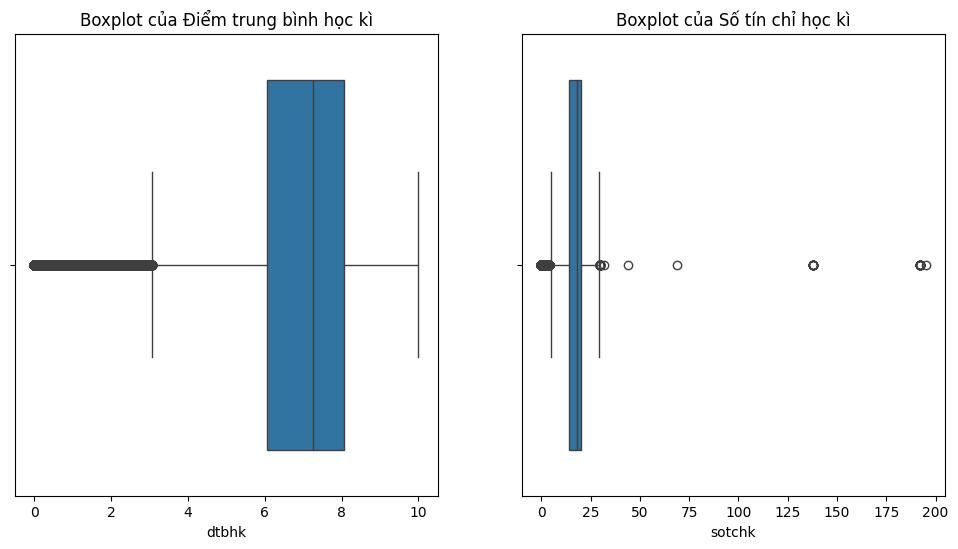

Outliers trong cột dtbhk:
[2.27 1.79 0.   0.46 0.28 0.81 0.45 2.77 1.43 2.53 3.05 1.35 0.05 0.37
 1.19 2.47 1.   2.33 1.08 1.16 1.17 0.14 0.76 0.43 0.55 0.57 2.59 0.06
 0.34 0.15 0.27 1.91 0.87 1.97 1.82 0.19 0.7  2.99 2.43 0.82 2.74 2.36
 2.3  1.05 1.02 2.32 0.3  0.69 1.54 2.16 1.3  0.09 2.02 1.88 2.98 0.86
 0.21 2.82 2.07 0.92 1.07 0.42 0.25 2.22 0.32 1.92 1.13 1.58 0.47 0.17
 2.23 1.71 0.48 2.45 1.51 2.86 1.85 2.46 1.53 2.29 0.72 2.4  0.85 1.69
 2.93 2.09 0.07 0.91 1.4  1.37 1.65 2.67 1.87 2.72 1.76 2.87 0.95 3.03
 2.37 1.68 0.66 1.78 1.26 2.76 2.85 1.83 2.63 1.7  2.78 0.63 3.04 1.39
 2.69 1.38 1.84 2.75 2.95 1.36 2.13 2.5  2.49 3.07 2.35 1.33 1.64 0.16
 1.23 0.9  2.7  0.56 0.24 1.74 0.38 2.31 1.56 2.24 2.58 0.71 2.57 0.11
 1.11 2.04 0.6  1.86 0.02 2.61 0.78 0.41 1.57 1.15 3.06 2.9  0.44 1.2
 0.39 1.49 1.73 0.4  2.11 1.32 2.26 0.26 2.54 0.33 1.24 2.01 0.2  0.1
 2.25 0.13 1.06 1.34 2.62 1.61 2.39 2.94 2.12 2.96 1.96 2.28 1.93 0.36
 2.97 0.93 0.73 1.72 2.17 0.8  1.42 2.14 3.   1.9  2.

In [ ]:
# Kiểm tra outliers ở 2 cột dtbhk và sotchk
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['dtbhk'])
plt.title('Boxplot của Điểm trung bình học kì')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['sotchk'])
plt.title('Boxplot của Số tín chỉ học kì')

plt.show()

# Sử dụng IQR để xác định outliers cho cột 'dtbhk'
Q1_dtbhk = df['dtbhk'].quantile(0.25)
Q3_dtbhk = df['dtbhk'].quantile(0.75)
IQR_dtbhk = Q3_dtbhk - Q1_dtbhk
lower_bound_dtbhk = Q1_dtbhk - 1.5 * IQR_dtbhk
upper_bound_dtbhk = Q3_dtbhk + 1.5 * IQR_dtbhk

outliers_dtbhk = df['dtbhk'][(df['dtbhk'] < lower_bound_dtbhk) | (df['dtbhk'] > upper_bound_dtbhk)]
print("Outliers trong cột dtbhk:")
print(outliers_dtbhk.unique())

# Sử dụng IQR để xác định outliers cho cột 'sotchk'
Q1_sotchk = df['sotchk'].quantile(0.25)
Q3_sotchk = df['sotchk'].quantile(0.75)
IQR_sotchk = Q3_sotchk - Q1_sotchk
lower_bound_sotchk = Q1_sotchk - 1.5 * IQR_sotchk
upper_bound_sotchk = Q3_sotchk + 1.5 * IQR_sotchk

outliers_sotchk = df['sotchk'][(df['sotchk'] < lower_bound_sotchk) | (df['sotchk'] > upper_bound_sotchk)]
print("Outliers trong cột sotchk:")
print(outliers_sotchk.unique())

Nhận xét: Các outliers của dtbhk có giá trị thấp dưới 3, các outlier của cột sotchk có giá trị chủ yếu là lớn hơn 30, các outlier của cột điêm không xử lí vì nó nằm ở trong giá trị phù hợp và có thể hữu ích cho bài toán


###Độ đo IQR

In [ ]:
# 1. Sử dụng IQR cho cột 'dtbhk'
Q1_dtbhk = df['dtbhk'].quantile(0.25)
Q3_dtbhk = df['dtbhk'].quantile(0.75)
IQR_dtbhk = Q3_dtbhk - Q1_dtbhk
lower_bound_dtbhk = Q1_dtbhk - 1.5 * IQR_dtbhk
upper_bound_dtbhk = Q3_dtbhk + 1.5 * IQR_dtbhk

outliers_dtbhk = df['dtbhk'][(df['dtbhk'] < lower_bound_dtbhk) | (df['dtbhk'] > upper_bound_dtbhk)]

# 2. Sử dụng IQR cho cột 'sotchk'
Q1_sotchk = df['sotchk'].quantile(0.25)
Q3_sotchk = df['sotchk'].quantile(0.75)
IQR_sotchk = Q3_sotchk - Q1_sotchk
lower_bound_sotchk = Q1_sotchk - 1.5 * IQR_sotchk
upper_bound_sotchk = Q3_sotchk + 1.5 * IQR_sotchk

outliers_sotchk = df['sotchk'][(df['sotchk'] < lower_bound_sotchk) | (df['sotchk'] > upper_bound_sotchk)]

# Tỷ lệ ngoại lai trước xử lý
outlier_percentage_dtbhk = len(outliers_dtbhk) / len(df) * 100
outlier_percentage_sotchk = len(outliers_sotchk) / len(df) * 100

print(f"Tỷ lệ ngoại lai của cột 'dtbhk' trước xử lý: {outlier_percentage_dtbhk:.2f}%")
print(f"Tỷ lệ ngoại lai của cột 'sotchk' trước xử lý: {outlier_percentage_sotchk:.2f}%")

Tỷ lệ ngoại lai của cột 'dtbhk' trước xử lý: 7.18%
Tỷ lệ ngoại lai của cột 'sotchk' trước xử lý: 6.18%


Tiến hành loại các giá trị outlier không đúng với giá trị thực tế, sotchk lớn hơn 30

In [ ]:
# --- Xử lý ngoại lai chỉ với cột 'sotchk' ---
df_cleaned = df[(df['sotchk'] >= 0) & (df['sotchk'] <= 30)]

# Tỷ lệ ngoại lai sau xử lý (cột 'sotchk' được thay đổi, 'dtbhk' giữ nguyên)
outliers_dtbhk_cleaned = df_cleaned['dtbhk'][(df_cleaned['dtbhk'] < lower_bound_dtbhk) | (df_cleaned['dtbhk'] > upper_bound_dtbhk)]
outliers_sotchk_cleaned = df_cleaned['sotchk'][(df_cleaned['sotchk'] < lower_bound_sotchk) | (df_cleaned['sotchk'] > upper_bound_sotchk)]

outlier_percentage_dtbhk_after = len(outliers_dtbhk_cleaned) / len(df_cleaned) * 100
outlier_percentage_sotchk_after = len(outliers_sotchk_cleaned) / len(df_cleaned) * 100

# In kết quả
print(f"Tỷ lệ ngoại lai của cột 'dtbhk' sau xử lý: {outlier_percentage_dtbhk_after:.2f}%")
print(f"Tỷ lệ ngoại lai của cột 'sotchk' sau xử lý: {outlier_percentage_sotchk_after:.2f}%")

# In số lượng hàng bị xóa
print(f"Số lượng hàng đã bị xóa do xử lý ngoại lai của 'sotchk': {len(df) - len(df_cleaned)}")

Tỷ lệ ngoại lai của cột 'dtbhk' sau xử lý: 7.18%
Tỷ lệ ngoại lai của cột 'sotchk' sau xử lý: 6.15%
Số lượng hàng đã bị xóa do xử lý ngoại lai của 'sotchk': 35


In [ ]:
print("Số lượng hàng còn lại sau khi xóa outliers sotchk:", len(df_cleaned))

Số lượng hàng còn lại sau khi xóa outliers sotchk: 84917


## Tính nhất quán

In [ ]:
df_cleaned.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2016,6.45,13
1,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2016,5.86,17
2,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2017,6.54,16
3,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2017,5.67,23
4,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2018,2.27,21


In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
print(df_cleaned.dtypes)

mssv       object
hocky       int64
namhoc      int64
dtbhk     float64
sotchk      int64
dtype: object


Các kiểu dữ liệu trong đây là phù hợp với các thuộc tính của dữ liệu

###Độ đo: Tỷ lệ giá trị đúng định dạng (Format Consistency)

In [ ]:
# Kiểm tra định dạng từng cột
# 1. Cột 'hocky' và 'namhoc' - kiểm tra có phải số nguyên hay không
invalid_hocky = df_cleaned[~df_cleaned['hocky'].apply(lambda x: isinstance(x, int))]
invalid_namhoc = df_cleaned[~df_cleaned['namhoc'].apply(lambda x: isinstance(x, int))]

# 2. Cột 'dtbhk' và 'sotchk' - kiểm tra có phải số thực hay không
invalid_dtbhk = df_cleaned[~df_cleaned['dtbhk'].apply(lambda x: isinstance(x, (float, int)))]
invalid_sotchk = df_cleaned[~df_cleaned['sotchk'].apply(lambda x: isinstance(x, (float, int)))]

# Tỷ lệ giá trị đúng định dạng
total_rows = len(df_cleaned)
format_consistency_hocky = (total_rows - len(invalid_hocky)) / total_rows * 100
format_consistency_namhoc = (total_rows - len(invalid_namhoc)) / total_rows * 100
format_consistency_dtbhk = (total_rows - len(invalid_dtbhk)) / total_rows * 100
format_consistency_sotchk = (total_rows - len(invalid_sotchk)) / total_rows * 100

# In kết quả
print("\nTỷ lệ giá trị đúng định dạng:")
print(f"- Cột 'hocky': {format_consistency_hocky:.2f}%")
print(f"- Cột 'namhoc': {format_consistency_namhoc:.2f}%")
print(f"- Cột 'dtbhk': {format_consistency_dtbhk:.2f}%")
print(f"- Cột 'sotchk': {format_consistency_sotchk:.2f}%")



Tỷ lệ giá trị đúng định dạng:
- Cột 'hocky': 100.00%
- Cột 'namhoc': 100.00%
- Cột 'dtbhk': 100.00%
- Cột 'sotchk': 100.00%


##Tính duy nhất

###Uniqueness = Số giá trị duy nhất / Tổng số giá trị

In [ ]:
# Kiểm tra giá trị duy nhất trong cột 'MSSV'
unique_mssv = df_cleaned['mssv'].unique()

# Tính tỷ lệ giá trị duy nhất
unique_count = len(unique_mssv)
total_count = len(df_cleaned)

# Tính tỷ lệ phần trăm giá trị duy nhất
unique_percentage = (unique_count / total_count) * 100

# In kết quả
if unique_count == total_count:
    print("Cột 'MSSV' là duy nhất cho mỗi giá trị.")
else:
    print("Cột 'MSSV' không phải là duy nhất cho mỗi giá trị sinh viên.")

print(f"Tỷ lệ giá trị duy nhất trong cột 'MSSV': {unique_percentage:.2f}%")


Cột 'MSSV' không phải là duy nhất cho mỗi giá trị sinh viên.
Tỷ lệ giá trị duy nhất trong cột 'MSSV': 16.00%


###Tỷ lệ không trùng lặp (Non-Duplicate Rate)

In [ ]:
# In ra các dòng trùng lặp
duplicates = df_cleaned[df_cleaned.duplicated()]

# Tính tỷ lệ các dòng trùng lặp
total_rows = len(df_cleaned)
duplicate_count = len(duplicates)
duplicate_ratio = duplicate_count / total_rows * 100  # Tính tỷ lệ theo phần trăm

# In kết quả
if duplicate_count > 0:
    print(duplicates)  # In các dòng trùng lặp
    print(f"\nSố lượng dòng trùng lặp: {duplicate_count}")
    print(f"Tỷ lệ dòng trùng lặp: {duplicate_ratio:.2f}%")
else:
    print("Không có giá trị trùng lặp.")
    print("Bộ dữ liệu đảm bảo duy nhất 100%")  # Thêm thông báo khi không có trùng lặp


Không có giá trị trùng lặp.
Bộ dữ liệu đảm bảo duy nhất 100%


Nhận xết: Bộ dữ liệu vẫn đảm tính duy nhất.
Duplicated() không phát hiện trùng lặp vì mỗi dòng dữ liệu là duy nhất khi kết hợp giữa MSSV, kỳ học và các giá trị khác.
MSSV sẽ xuất hiện nhiều lần trong dữ liệu, nhưng không phải là trùng lặp không hợp lệ, vì đó là sự xuất hiện của sinh viên trong các kỳ học khác nhau.

## Chọn các thuộc tính quan trọng

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84917 entries, 0 to 84951
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    84917 non-null  object 
 1   hocky   84917 non-null  int64  
 2   namhoc  84917 non-null  int64  
 3   dtbhk   84917 non-null  float64
 4   sotchk  84917 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.9+ MB


In [ ]:
selected_columns = df_cleaned[['mssv', 'hocky', 'namhoc', 'dtbhk', 'sotchk']]

In [ ]:
# Lưu DataFrame vào file Excel với tên là 'sinhvien_dtb_hocky_cleaned.xlsx'
selected_columns.to_excel('sinhvien_dtb_hocky_cleaned.xlsx', index=False)

#sinhvien_dtb_toankhoa.xlsx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc file Excel
file_path = r"sinhvien_dtb_toankhoa.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.head()

,mssv,dtb_toankhoa,dtb_tichluy,sotc_tichluy
0,C410FEC4XPvAibaEXe/odi52as1TQ/z6UAtEIyTx,7.00,7.00,144.0
1,4555C74CXPvAibaEXe8UBGVVSBKSkjQKdKZAX7FE,6.34,6.34,153.0
2,6FB8C971XPvAibaEXe8zjuWfAVBr9Syz83phZPbU,2.31,0.00,0.0
3,7D7299A4XPvAibaEXe9hYalhCsDQbVspsqAf44vo,8.21,8.21,148.0
4,590263C4XPvAibaEXe9mDsFtgVHJ/lr5wIkYTfyo,8.32,8.32,148.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13970 entries, 0 to 13969
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          13970 non-null  object 
 1   dtb_toankhoa  13648 non-null  float64
 2   dtb_tichluy   13648 non-null  float64
 3   sotc_tichluy  13648 non-null  float64
dtypes: float64(3), object(1)
memory usage: 436.7+ KB


##Tính đầy đủ


In [ ]:

# Kiểm tra tính đầy đủ của tất cả các cột trong bộ dữ liệu
for column in df.columns:
    missing_values = df[column].isnull().sum()  # Số lượng giá trị bị thiếu trong cột
    print(f"Số lượng giá trị thiếu trong cột '{column}': {missing_values}")

Số lượng giá trị thiếu trong cột 'mssv': 0
Số lượng giá trị thiếu trong cột 'dtb_toankhoa': 322
Số lượng giá trị thiếu trong cột 'dtb_tichluy': 322
Số lượng giá trị thiếu trong cột 'sotc_tichluy': 322


Dữ liệu còn bị thiếu ở các cột dtb_toankhoa, dtb_tichluy, sotc_tichluy

###Độ đo Completeness

In [ ]:
# Danh sách các cột quan trọng
important_columns = ['dtb_tichluy', 'sotc_tichluy', 'dtb_toankhoa']

# 1. Kiểm tra tính đầy đủ trước xử lý
print("Tính đầy đủ trước khi xử lý:")
for column in important_columns:
    completeness = df[column].notnull().sum() / len(df)
    print(f"Completeness của cột '{column}': {completeness:.2%}")

# 2. Xóa các hàng có giá trị thiếu ở cột dtb_toankhoa
df.dropna(subset=['dtb_toankhoa'], inplace=True)

# 3. Kiểm tra lại tính đầy đủ sau khi xử lý
print("\nTính đầy đủ sau khi xử lý:")
for column in important_columns:
    completeness = df[column].notnull().sum() / len(df)
    print(f"Completeness của cột '{column}': {completeness:.2%}")

Tính đầy đủ trước khi xử lý:
Completeness của cột 'dtb_tichluy': 97.70%
Completeness của cột 'sotc_tichluy': 97.70%
Completeness của cột 'dtb_toankhoa': 97.70%

Tính đầy đủ sau khi xử lý:
Completeness của cột 'dtb_tichluy': 100.00%
Completeness của cột 'sotc_tichluy': 100.00%
Completeness của cột 'dtb_toankhoa': 100.00%


# Tính chính xác

In [ ]:
df.describe()

,dtb_toankhoa,dtb_tichluy,sotc_tichluy
count,13648.000000,13648.000000,13648.000000
mean,6.916518,7.313278,94.115988
std,1.748020,1.396699,50.574767
min,0.000000,0.000000,0.000000
25%,6.550000,6.910000,50.000000
50%,7.370000,7.470000,104.000000
75%,8.010000,8.050000,141.000000
max,9.660000,9.660000,193.000000


Nhận xét:
Cột dtb_toankhoa và dtb_tichluy: Khoảng giá trị: Giá trị trung bình (GPA) thường nằm trong khoảng từ 0 đến 10. Dữ liệu này có giá trị từ 0.0 (min) đến 9.66 (max), cho thấy giá trị nằm trong phạm vi hợp lệ.
Cột sotc_tichluy: Khoảng giá trị: Số tín chỉ tích lũy (sotc_tichluy) có giá trị từ 0 đến 193. Số tín chỉ nhỏ nhất là 0.0, điều này có thể gợi ý rằng có sinh viên chưa tích lũy được tín chỉ nào. Cần kiểm tra để đảm bảo không có lỗi nhập dữ liệu hoặc hệ thống.

###Tỷ lệ chính xác (Accuracy)
Accuracy = Số giá trị chính xác / Tổng số giá trị

In [ ]:
# Kiểm tra tính hợp lý của điểm toàn khóa (dtb_toankhoa) và điểm tích lũy (dtb_tichluy)
valid_dtb_toankhoa = df['dtb_toankhoa'].apply(lambda x: 0 <= x <= 10)
valid_dtb_tichluy = df['dtb_tichluy'].apply(lambda x: 0 <= x <= 10)

# Tính phần trăm giá trị hợp lệ
valid_dtb_toankhoa_percentage = (valid_dtb_toankhoa.sum() / len(df)) * 100
valid_dtb_tichluy_percentage = (valid_dtb_tichluy.sum() / len(df)) * 100

# In kết quả
print(f'Phần trăm giá trị hợp lệ của dtb_toankhoa: {valid_dtb_toankhoa_percentage:.2f}%')
print(f'Phần trăm giá trị hợp lệ của dtb_tichluy: {valid_dtb_tichluy_percentage:.2f}%')

Phần trăm giá trị hợp lệ của dtb_toankhoa: 100.00%
Phần trăm giá trị hợp lệ của dtb_tichluy: 100.00%


Nhận xét: Các cột điểm hợp lệ phù hợp với giá trị điểm từ 0 đến 10.

### Xử lí giá trị outlier

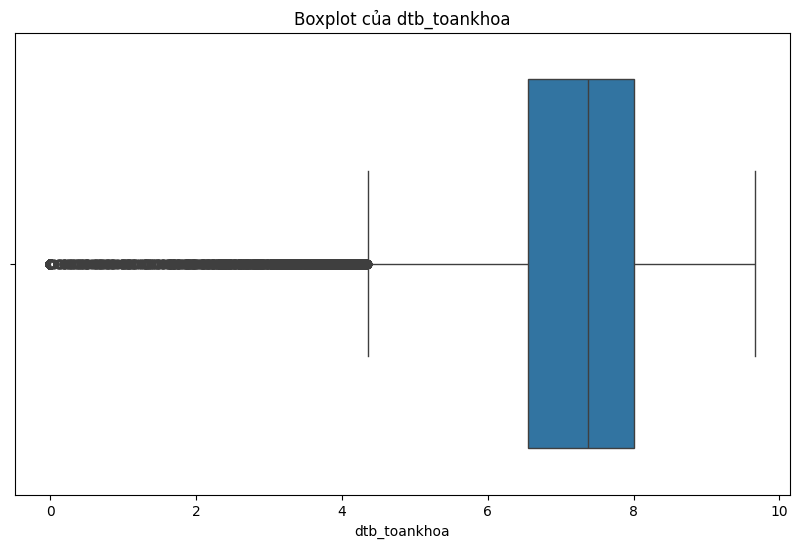

Outliers trong cột dtb_toankhoa:
[2.31 0.29 4.27 2.88 0.99 1.8  0.71 2.47 2.59 2.09 4.11 3.4  4.32 2.58
 4.35 0.92 2.93 0.   4.19 1.47 3.04 1.98 3.71 2.54 3.09 4.26 0.48 4.34
 2.73 3.16 4.1  0.19 2.99 3.03 0.84 3.9  3.67 2.9  2.89 4.29 3.85 4.17
 4.13 4.15 3.84 0.47 4.21 0.39 1.77 1.71 3.98 2.63 3.19 2.67 3.62 3.12
 2.72 1.08 1.6  2.04 3.51 2.6  3.44 0.86 3.42 3.1  3.97 1.85 1.96 3.66
 4.22 4.33 1.68 0.66 3.74 3.27 3.13 3.64 0.44 4.16 3.91 0.24 3.5  2.81
 4.05 1.33 3.18 3.47 2.49 2.52 4.   3.69 2.11 2.01 3.96 3.37 4.01 0.45
 2.18 0.91 1.02 2.12 3.02 2.97 3.32 2.45 2.42 3.45 1.34 0.49 3.61 3.08
 0.73 1.55 1.75 4.06 3.8  4.31 2.57 3.77 3.81 1.3  3.2  0.27 2.23 3.23
 2.87 3.38 4.09 4.25 1.5  2.46 1.49 2.66 4.03 2.1  1.67 0.7  3.11 3.55
 1.7  2.82 3.21 3.39 3.25 0.15 3.06 2.98 0.98 4.04 2.56 3.76 2.38 1.83
 1.88 1.97 2.32 3.7  2.35 1.91 1.17 2.37 3.86 2.33 1.39 1.43 2.7  2.91
 3.53 4.2  3.34 1.07 0.43 2.64 0.64 1.72 0.79 1.94 0.33 2.05 3.3  1.89
 1.41 2.3  1.24 3.65 3.68 2.25 2.24 3.94 3.3

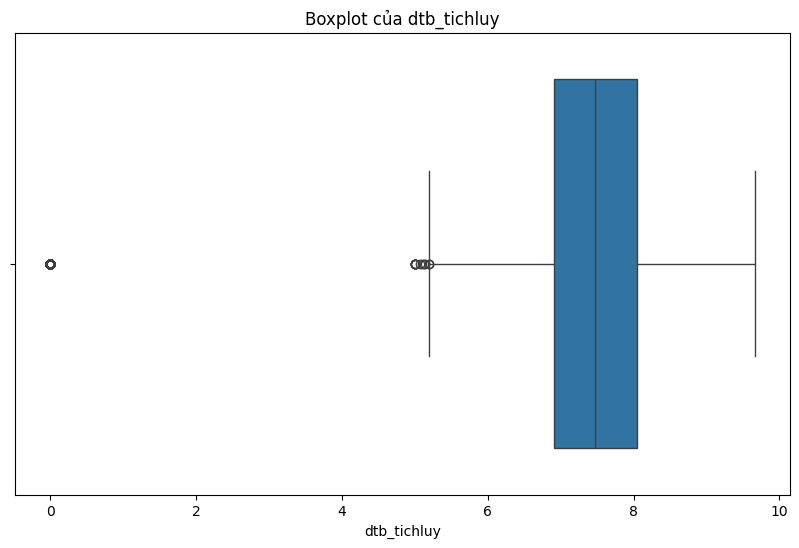

Outliers trong cột dtb_tichluy:
[0.   5.07 5.   5.1  5.12 5.19 5.14]


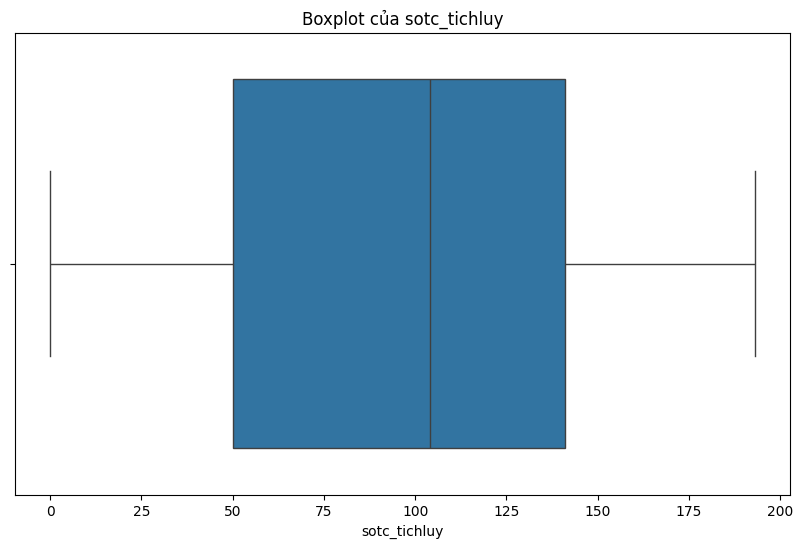

Outliers trong cột sotc_tichluy:
[]


In [ ]:
# Kiểm tra giá trị ngoại lai (Outliers) của df_dtb_toankhoa
for column in ['dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot của {column}')
  plt.show()

  # Sử dụng IQR để xác định outliers
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f"Outliers trong cột {column}:")
  print(outliers.unique())

###Phát hiện ngoại lai (Outlier Detection):Sử dụng IQR

In [ ]:
# Danh sách các cột cần kiểm tra ngoại lai
columns_to_check = ['dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']

# Tạo dictionary để lưu số lượng ngoại lai trước khi xử lý
outliers_count = {}

# Phát hiện ngoại lai cho từng cột
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    outliers_count[column] = len(outliers)

    # Tính tỷ lệ phần trăm ngoại lai trong cột
    outliers_percentage = (len(outliers) / len(df)) * 100

    # In kết quả
    print(f"Số giá trị ngoại lai trong cột '{column}' : {len(outliers)}")
    print(f"Tỷ lệ phần trăm ngoại lai trong cột '{column}': {outliers_percentage:.2f}%")


Số giá trị ngoại lai trong cột 'dtb_toankhoa' : 1247
Tỷ lệ phần trăm ngoại lai trong cột 'dtb_toankhoa': 9.14%
Số giá trị ngoại lai trong cột 'dtb_tichluy' : 361
Tỷ lệ phần trăm ngoại lai trong cột 'dtb_tichluy': 2.65%
Số giá trị ngoại lai trong cột 'sotc_tichluy' : 0
Tỷ lệ phần trăm ngoại lai trong cột 'sotc_tichluy': 0.00%


Nhận xét: Giữ lại các dữ liệu các outlier vì vẫn nằm trong giá trị phù hợp

# Tính nhất quán

In [ ]:
df.head()

,mssv,dtb_toankhoa,dtb_tichluy,sotc_tichluy
0,C410FEC4XPvAibaEXe/odi52as1TQ/z6UAtEIyTx,7.00,7.00,144.0
1,4555C74CXPvAibaEXe8UBGVVSBKSkjQKdKZAX7FE,6.34,6.34,153.0
2,6FB8C971XPvAibaEXe8zjuWfAVBr9Syz83phZPbU,2.31,0.00,0.0
3,7D7299A4XPvAibaEXe9hYalhCsDQbVspsqAf44vo,8.21,8.21,148.0
4,590263C4XPvAibaEXe9mDsFtgVHJ/lr5wIkYTfyo,8.32,8.32,148.0


In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
print(df.dtypes)

mssv             object
dtb_toankhoa    float64
dtb_tichluy     float64
sotc_tichluy    float64
dtype: object


###Độ đo: Tỷ lệ giá trị đúng định dạng (Format Consistency)

In [ ]:
# Kiểm tra cột 'dtb_toankhoa' là kiểu số
valid_dtb_toankhoa = df['dtb_toankhoa'].apply(lambda x: isinstance(x, (int, float))).sum()
consistency_dtb_toankhoa = valid_dtb_toankhoa / len(df)
print(f"Consistency của cột 'dtb_toankhoa': {consistency_dtb_toankhoa:.2%}")

# Kiểm tra cột 'dtb_tichluy' là kiểu số
valid_dtb_tichluy = df['dtb_tichluy'].apply(lambda x: isinstance(x, (int, float))).sum()
consistency_dtb_tichluy = valid_dtb_tichluy / len(df)
print(f"Consistency của cột 'dtb_tichluy': {consistency_dtb_tichluy:.2%}")

# Kiểm tra cột 'sotc_tichluy' là kiểu số
valid_sotc_tichluy = df['sotc_tichluy'].apply(lambda x: isinstance(x, (int, float))).sum()
consistency_sotc_tichluy = valid_sotc_tichluy / len(df)
print(f"Consistency của cột 'sotc_tichluy': {consistency_sotc_tichluy:.2%}")


Consistency của cột 'dtb_toankhoa': 100.00%
Consistency của cột 'dtb_tichluy': 100.00%
Consistency của cột 'sotc_tichluy': 100.00%


Các kiểu dữ liệu trong đây là phù hợp với các thuộc tính của dữ liệu

#Tính duy nhất

###Uniqueness = Số giá trị duy nhất / Tổng số giá trị


In [ ]:
# Tính duy nhất cho cột 'mssv'
uniqueness_mssv = df['mssv'].nunique() / len(df)
print(f"Tính duy nhất của cột 'mssv': {uniqueness_mssv:.2%}")

Tính duy nhất của cột 'mssv': 100.00%


In [ ]:
# Kiểm tra giá trị duy nhất trong cột 'MSSV'
unique_mssv = df['mssv'].unique()

# Đếm số lượng giá trị duy nhất và tổng số dòng
num_unique_mssv = len(unique_mssv)
num_rows = len(df)

# Kiểm tra xem cột 'MSSV' có duy nhất không
if num_unique_mssv == num_rows:
    print(f"Cột 'MSSV' là duy nhất cho mỗi giá trị sinh viên.")
else:
    print(f"Cột 'MSSV' không phải là duy nhất cho mỗi giá trị sinh viên.")

# In ra số lượng giá trị duy nhất và số lượng bản ghi
print(f"Số lượng giá trị duy nhất trong cột 'MSSV': {num_unique_mssv}")
print(f"Tổng số lượng bản ghi trong DataFrame: {num_rows}")


Cột 'MSSV' là duy nhất cho mỗi giá trị sinh viên.
Số lượng giá trị duy nhất trong cột 'MSSV': 13648
Tổng số lượng bản ghi trong DataFrame: 13648


###Tỷ lệ không trùng lặp (Non-Duplicate Rate)

In [ ]:
# Kiểm tra và xác định các dòng trùng lặp
duplicates = df[df.duplicated()]

# Kiểm tra nếu có dòng trùng lặp
if len(duplicates) > 0:
    print(duplicates)  # In các dòng trùng lặp
    print(f"\nSố lượng dòng trùng lặp: {len(duplicates)}")

    # Tính tỷ lệ phần trăm các dòng trùng lặp
    duplicate_percentage = len(duplicates) / len(df) * 100
    print(f"Tỷ lệ phần trăm các dòng trùng lặp: {duplicate_percentage:.2f}%")
else:
    # Nếu không có trùng lặp, in tỷ lệ 0%
    print("Không có giá trị trùng lặp.")
    print(f"Bộ dữ liệu đảm bảo duy nhất 100%")


Không có giá trị trùng lặp.
Bộ dữ liệu đảm bảo duy nhất 100%


Nhận xét: Bộ dữ liệu đảm bảo tính duy nhất

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13648 entries, 0 to 13969
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          13648 non-null  object 
 1   dtb_toankhoa  13648 non-null  float64
 2   dtb_tichluy   13648 non-null  float64
 3   sotc_tichluy  13648 non-null  float64
dtypes: float64(3), object(1)
memory usage: 533.1+ KB


##Chọn thuộc tính quan trọng

In [ ]:
selected_columns = df[['mssv', 'dtb_toankhoa', 'dtb_tichluy', 'sotc_tichluy']]

In [ ]:
# Lưu DataFrame vào file Excel với tên là 'sinhvien_dtb_hocky_cleaned.xlsx'
selected_columns.to_excel('sinhvien_dtb_toankhoa_cleaned.xlsx', index=False)

#ThiSinh.xlsx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

file_path = r"/content/ThiSinh.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            8234 non-null   object 
 1   dien_tt         8234 non-null   object 
 2   diem_tt         8104 non-null   float64
 3   lop12_matinh    6060 non-null   float64
 4   lop12_matruong  6061 non-null   float64
 5   TEN_TRUONG      6060 non-null   object 
dtypes: float64(3), object(3)
memory usage: 386.1+ KB


## Chọn các cột quan trọng

In [ ]:
# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

In [ ]:
# Lọc các cột quan trọng
df_filtered = df[['mssv', 'dien_tt', 'diem_tt']]

In [ ]:
# Hiển thị 5 hàng đầu tiên
print(df_filtered.head())

                                       mssv dien_tt  diem_tt
0  7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU    THPT     24.5
1  0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR    THPT     27.5
2  BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG    THPT     25.0
3  599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V    THPT     28.0
4  364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe    THPT     24.5


## Tính Đầy Đủ

Đảm bảo không có dữ liệu bị thiếu  trong các cột quan trọng.


###Độ đo Completeness

In [ ]:
# Tính tỷ lệ đầy đủ trước khi xử lý
completeness_before = (df_filtered.notnull().mean()) * 100  # Tỷ lệ các giá trị không bị thiếu (%)
print("Tỷ lệ đầy đủ trước khi xử lý:\n", completeness_before)

Tỷ lệ đầy đủ trước khi xử lý:
 mssv       100.00000
dien_tt    100.00000
diem_tt     98.42118
dtype: float64


In [ ]:
# Kiểm tra tổng số giá trị bị thiếu trong từng cột
missing_values = df_filtered.isnull().sum()
print("Số lượng giá trị bị thiếu trong mỗi cột:\n", missing_values)

Số lượng giá trị bị thiếu trong mỗi cột:
 mssv         0
dien_tt      0
diem_tt    130
dtype: int64


In [ ]:
# Giá trị b cho công thức quy đổi
b = 0.4

# Quy đổi điểm theo điều kiện
def quy_doi_diem(row):
    if row['dien_tt'] == "THPT":
        return row['diem_tt']
    elif row['dien_tt'] == "ĐGNL":
        return 30 * ((row['diem_tt'] / 1200) ** b)
    else:
        return 30

In [ ]:
# Áp dụng hàm quy đổi
df_filtered['diem_tt'] = df_filtered.apply(quy_doi_diem, axis=1)

<ipython-input-48-c6f0897dd431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diem_tt'] = df_filtered.apply(quy_doi_diem, axis=1)


In [ ]:
df_filtered['diem_tt']

,diem_tt
0,24.50
1,27.50
2,25.00
3,28.00
4,24.50
...,...
8229,21.10
8230,23.95
8231,21.50
8232,24.70


In [ ]:
# Tính tỷ lệ đầy đủ sau khi xử lý
completeness_after = (df_filtered.notnull().mean()) * 100  # Tỷ lệ các giá trị không bị thiếu (%)
print("Tỷ lệ đầy đủ sau khi xử lý:\n", completeness_after)

Tỷ lệ đầy đủ sau khi xử lý:
 mssv       100.00000
dien_tt    100.00000
diem_tt     99.97571
dtype: float64


## Tính Chính Xác
Kiểm tra các cột có giá trị bất hợp lý hoặc sai sót.

###Tỷ lệ chính xác (Accuracy)

In [ ]:
# Kiểm tra tính chính xác của cột 'diem', kiểm tra khoảng giá trị diem_tt < 40 do có thể cộng điểm ưu tiên nên điểm có thể cao hơn 30
valid_diem = df_filtered[(df_filtered['diem_tt'] >= 0) & (df_filtered['diem_tt'] <= 40)]

# Tính tỷ lệ giá trị chính xác
accuracy = (len(valid_diem) / len(df_filtered)) * 100

# In tỷ lệ chính xác
print(f"Tỷ lệ giá trị chính xác của cột 'diem': {accuracy:.2f}%")


Tỷ lệ giá trị chính xác của cột 'diem': 99.98%


In [ ]:
# Các giá trị hợp lệ trong cột 'diem_tt'
valid_diem_tt_values = ['THPT', 'TT-Bộ', 'CUTUYEN', 'ƯT-Bộ', '30A', 'ƯT-ĐHQG', 'ĐGNL', 'CCQT']

# Kiểm tra các giá trị hợp lệ trong cột 'diem_tt'
valid_diem_tt_count = df_filtered['dien_tt'].isin(valid_diem_tt_values).sum()

# Tính tỷ lệ chính xác (Accuracy)
accuracy_diem_tt = (valid_diem_tt_count / len(df_filtered)) * 100

# In tỷ lệ chính xác
print(f"Tỷ lệ giá trị hợp lệ (Accuracy) trong cột 'dien_tt': {accuracy_diem_tt:.2f}%")


Tỷ lệ giá trị hợp lệ (Accuracy) trong cột 'dien_tt': 100.00%


###IQR

In [ ]:
# Tính Q1 (25th percentile) và Q3 (75th percentile) cho cột 'diem_tt'
Q1 = df_filtered['diem_tt'].quantile(0.25)
Q3 = df_filtered['diem_tt'].quantile(0.75)

# Tính IQR (Interquartile Range)
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Kiểm tra outlier: các giá trị ngoài phạm vi [lower_bound, upper_bound]
outlier_diem_iqr = df_filtered[(df_filtered['diem_tt'] < lower_bound) | (df_filtered['diem_tt'] > upper_bound)]

# Tính tỷ lệ outlier
outlier_percentage_iqr = (len(outlier_diem_iqr) / len(df_filtered)) * 100

# In tỷ lệ outlier theo IQR
print(f"Tỷ lệ outlier trong cột 'diem_tt' theo IQR: {outlier_percentage_iqr:.2f}%")


Tỷ lệ outlier trong cột 'diem_tt' theo IQR: 0.62%


TẠM THỜI KHÔNG CÓ GÌ BẤT ỔN

## Tính Nhất Quán
Đảm bảo dữ liệu được chuẩn hóa và đồng nhất.

###Độ đo: Tỷ lệ giá trị đúng định dạng (Format Consistency)

In [ ]:
# Danh sách các giá trị hợp lệ cho cột 'dien_tt'
valid_categories = ['THPT', 'TT-Bộ', 'CUTUYEN', 'ƯT-Bộ', '30A', 'ƯT-ĐHQG', 'ĐGNL', 'CCQT']

# Kiểm tra xem các giá trị trong cột 'dien_tt' có thuộc một trong các danh mục hợp lệ không
valid_dien_tt = df_filtered['dien_tt'].isin(valid_categories)

# Tính tỷ lệ giá trị đúng định dạng
dien_tt_accuracy = (valid_dien_tt.sum() / len(df_filtered)) * 100

# In tỷ lệ giá trị đúng định dạng trong cột 'dien_tt'
print(f"Tỷ lệ giá trị đúng định dạng trong cột 'dien_tt': {dien_tt_accuracy:.2f}%")


Tỷ lệ giá trị đúng định dạng trong cột 'dien_tt': 100.00%


In [ ]:
# Kiểm tra xem các giá trị trong cột 'diem_tt' có phải là số thực không
is_float = df_filtered['diem_tt'].apply(lambda x: isinstance(x, float))

# Tính tỷ lệ giá trị đúng định dạng (số thực)
dien_tt_float_accuracy = (is_float.sum() / len(df_filtered)) * 100

# In tỷ lệ giá trị là số thực trong cột 'dien_tt'
print(f"Tỷ lệ giá trị là số thực trong cột 'diem_tt': {dien_tt_float_accuracy:.2f}%")


Tỷ lệ giá trị là số thực trong cột 'diem_tt': 100.00%


## Tính Duy Nhất
Đảm bảo các bản ghi không bị trùng lặp, đặc biệt là cột khóa chính mssv.

###Uniqueness = Số giá trị duy nhất / Tổng số giá trị

In [ ]:
# Tính tỷ lệ giá trị duy nhất trong cột 'mssv' trước khi loại bỏ trùng lặp
uniqueness_before = df['mssv'].nunique() / len(df)
print(f"Tỷ lệ giá trị duy nhất trước khi loại bỏ trùng lặp: {uniqueness_before:.2%}")

# Loại bỏ các bản ghi trùng lặp dựa trên cột 'mssv'
df_filtered = df_filtered.drop_duplicates(subset=['mssv'], keep='first')

# Tính tỷ lệ giá trị duy nhất trong cột 'mssv' sau khi loại bỏ trùng lặp
uniqueness_after = df_filtered['mssv'].nunique() / len(df_filtered)
print(f"Tỷ lệ giá trị duy nhất sau khi loại bỏ trùng lặp: {uniqueness_after:.2%}")


Tỷ lệ giá trị duy nhất trước khi loại bỏ trùng lặp: 100.00%
Tỷ lệ giá trị duy nhất sau khi loại bỏ trùng lặp: 100.00%


###Non-Duplicate Rate

In [ ]:
# Tính số lượng các hàng không bị trùng lặp
non_duplicate_count = df_filtered.drop_duplicates().shape[0]

# Tính tỷ lệ không trùng lặp
non_duplicate_rate = (non_duplicate_count / len(df_filtered)) * 100

# In tỷ lệ không trùng lặp
print(f"Tỷ lệ không trùng lặp (Non-Duplicate Rate): {non_duplicate_rate:.2f}%")


Tỷ lệ không trùng lặp (Non-Duplicate Rate): 100.00%


In [ ]:
# Kiểm tra tổng quan dữ liệu sau khi làm sạch
print(df_filtered.info())
print(df_filtered.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mssv     8234 non-null   object 
 1   dien_tt  8234 non-null   object 
 2   diem_tt  8232 non-null   float64
dtypes: float64(1), object(2)
memory usage: 193.1+ KB
None
                                       mssv dien_tt  diem_tt
0  7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU    THPT     24.5
1  0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR    THPT     27.5
2  BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG    THPT     25.0
3  599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V    THPT     28.0
4  364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe    THPT     24.5


In [ ]:
# Lưu dữ liệu làm sạch vào file Excel
df_filtered.to_excel("thisinh_cleaned.xlsx", index=False)